In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from pydataset import data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score as evs

from math import sqrt

import evaluate

In [44]:
df = data('tips')

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df = df[['tip', 'total_bill']]
df.rename(columns={'tip': 'y', 'total_bill': 'x'}, inplace=True)

In [47]:
df.head()

,y,x
1,1.01,16.99
2,1.66,10.34
3,3.50,21.01
4,3.31,23.68
5,3.61,24.59


In [48]:
model = ols('y ~ x', data=df).fit()
df['yhat'] = model.predict(df.x)

In [49]:
df.head()

,y,x,yhat
1,1.01,16.99,2.704636
2,1.66,10.34,2.006223
3,3.50,21.01,3.126835
4,3.31,23.68,3.407250
5,3.61,24.59,3.502822


In [50]:
df['residual'] = df.yhat - df.y

In [51]:
df.head()

,y,x,yhat,residual
1,1.01,16.99,2.704636,1.694636
2,1.66,10.34,2.006223,0.346223
3,3.50,21.01,3.126835,-0.373165
4,3.31,23.68,3.407250,0.097250
5,3.61,24.59,3.502822,-0.107178


Text(16.299999999999997, 0.5, 'Predicted Y Value')

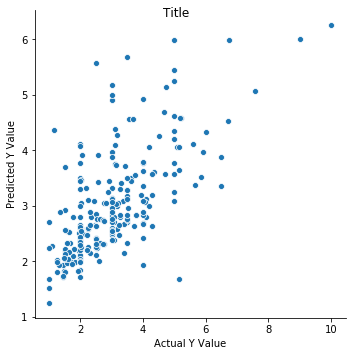

In [52]:
sns.relplot(x='y', y='yhat', data=df)
plt.suptitle('Title')
plt.xlabel('Actual Y Value')
plt.ylabel('Predicted Y Value')

In [53]:
df['yhat_bl'] = df.y.mean()

In [54]:
df.head()

,y,x,yhat,residual,yhat_bl
1,1.01,16.99,2.704636,1.694636,2.998279
2,1.66,10.34,2.006223,0.346223,2.998279
3,3.50,21.01,3.126835,-0.373165,2.998279
4,3.31,23.68,3.407250,0.097250,2.998279
5,3.61,24.59,3.502822,-0.107178,2.998279


In [55]:
SSE = mse(df.y, df.yhat) * len(df)
SSE_bl = mse(df.y, df.yhat_bl) * len(df)

In [56]:
MSE = mse(df.y, df.yhat)
MSE_bl = mse(df.y, df.yhat_bl)

In [57]:
RMSE = sqrt(MSE)
RMSE_bl = sqrt(MSE_bl)

In [58]:
print(f'''
Model:
SSE: Sum of Squared Errors = {SSE}
MSE: Mean Squared Errors = {MSE}
RMSE: Root Mean Squared Error = {RMSE}
''')


Model:
SSE: Sum of Squared Errors = 252.788743850776
MSE: Mean Squared Errors = 1.036019442011377
RMSE: Root Mean Squared Error = 1.0178504025697377



In [59]:
print(f'''
Base-line:
SSE: Sum of Squared Errors = {SSE_bl}
MSE: Mean Squared Errors = {MSE_bl}
RMSE: Root Mean Squared Error = {RMSE_bl}
''')


Base-line:
SSE: Sum of Squared Errors = 465.2124770491804
MSE: Mean Squared Errors = 1.906608512496641
RMSE: Root Mean Squared Error = 1.3807999538298954



In [60]:
if SSE < SSE_bl:
    print('Model performed better than baseline.')
else:
    print('Model sucks.')

Model performed better than baseline.


In [61]:
if model.f_pvalue < .05:
    print('Model has significant predictions')
else: 
    ('Model does not make significant predictions') 

Model has significant predictions


Text(16.299999999999997, 0.5, 'Predicted')

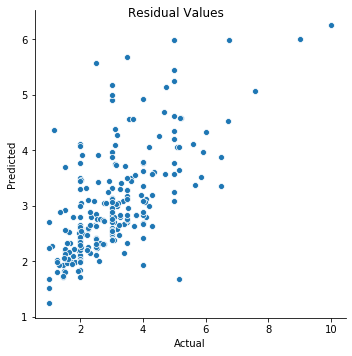

In [93]:
evaluate.plot_residuals('y', 'yhat', df)
plt.suptitle('Residual Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [94]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(df.y, df.yhat)

In [64]:
print(SSE, ESS, TSS, MSE, RMSE)

252.788743850776 4847.833384166932 8261.662393162398 1.036019442011377 1.0178504025697377


In [65]:
SSE_bl, MSE_bl, RMSE_bl = evaluate.baseline_mean_errors(df.y, df.yhat_bl)

In [66]:
SSE_bl, MSE_bl, RMSE_bl

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [70]:
evaluate.better_than_baseline(RMSE, RMSE_bl)

Model is better than baseline


In [71]:
EVS = evaluate.model_significance(model, df.y, df.yhat)

p: 6.692470646863376e-34 is less than alpha: 0.05, therefore our model is significant.
EVS: 0.4566165863516767


## Time to test functions on a different dataset!

In [72]:
mpg = data('mpg')

In [73]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [74]:
mpg = mpg[['displ', 'hwy']]

In [75]:
mpg.rename(columns={'displ': 'x', 'hwy': 'y'}, inplace=True)

In [76]:
mpg.head(1)

,x,y
1,1.8,29


In [77]:
model = ols('y ~ x', data=mpg).fit()
mpg['ybar'] = df.y.mean()
mpg['yhat'] = model.predict(mpg.x)

In [78]:
mpg.head(1)

,x,y,ybar,yhat
1,1.8,29,2.998279,29.342591


Text(0.29999999999999716, 0.5, 'Predicted')

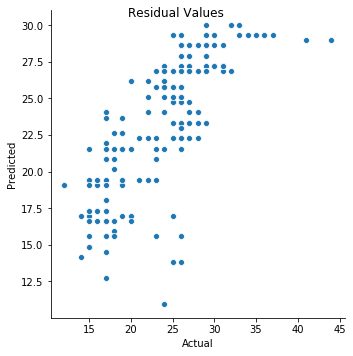

In [96]:
evaluate.plot_residuals('y', 'yhat', mpg)
plt.suptitle('Residual Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [84]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(mpg.y, mpg.yhat)

In [85]:
SSE_bl, MSE_bl, RMSE_bl = evaluate.baseline_mean_errors(mpg.y, mpg.ybar)

In [86]:
evaluate.better_than_baseline(RMSE, RMSE_bl)

Model is better than baseline


In [106]:
EVS = evaluate.model_significance(model, mpg.y, mpg.yhat)

p: 2.0389744555910457e-46 is less than alpha: 0.05, therefore our model is significant.


EVS: 0.5867866723989039
